In [2]:
import os
import pandas as pd
import numpy as np
import re

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats, display

In [14]:
path = './'
file_list = os.listdir(path)
file_list_py = [file for file in file_list]
# file_list_py = [file for file in file_list if file.endswith('.csv')]

In [15]:
file_list_py

['.ipynb_checkpoints', 'train.csv', 'Untitled.ipynb']

In [3]:
t = pd.read_csv('train.csv')

In [18]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
print('변환 전: \n',t['Embarked'].head())

변환 전: 
 0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object


In [24]:
dummies = pd.get_dummies(t[['Embarked']])
dummies

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [25]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
t1 = t.drop(columns=['Cabin'])

In [28]:
t2 = t1.dropna()

In [34]:
outlier = t2[t2['Age']-np.floor(t2['Age']) > 0 ]['Age']

In [36]:
print('이상치 처리 전 샘플 개수: %d' %(len(t2)))
print('이상치 개수: %d' %(len(outlier)))

이상치 처리 전 샘플 개수: 712
이상치 개수: 25


In [37]:
t3 = t2[t2['Age']-np.floor(t2['Age'])==0]

In [39]:
len(t3)

687

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = t3.drop(columns=['Survived'])

In [42]:
y = t3['Survived']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [47]:
207 / 687

0.30131004366812225

In [45]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

480
207
480
207


In [48]:
X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

In [49]:
train_X = pd.DataFrame(X,columns=['X'])

In [50]:
train_Y = pd.Series(Y)

In [54]:
print('전 처리한 X 데이터: \n {}'.format(train_X))
print('전 처리한 X 데이터 shape: {}\n'.format(train_X.shape))

print('전 처리한 Y 데이터: \n {}'.format(train_Y))
print('전 처리한 Y 데이터 shape: {}'.format(train_Y.shape))

전 처리한 X 데이터: 
           X
0  8.701538
1  3.908258
2  1.893624
3  3.287300
4  7.393330
5  2.989846
6  2.257572
7  9.844507
8  9.945895
9  5.483216
전 처리한 X 데이터 shape: (10, 1)

전 처리한 Y 데이터: 
 0    5.644131
1    3.758766
2    3.872333
3    4.409904
4    6.438450
5    4.028278
6    2.261060
7    7.157690
8    6.290974
9    5.196929
dtype: float64
전 처리한 Y 데이터 shape: (10,)


In [57]:
from sklearn.linear_model import LinearRegression

lrmodel = LinearRegression()

In [58]:
lrmodel.fit(train_X, train_Y)

LinearRegression()

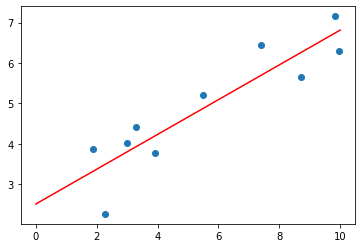

In [61]:
plt.scatter(X, Y) 
plt.plot([0, 10], [lrmodel.intercept_, 10 * lrmodel.coef_[0] + lrmodel.intercept_], c='r') 


# EDA practice

In [4]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
t.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
t[['Cabin']]

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


In [9]:
print(t['Cabin'].isnull().sum()) #null값인 행의 개수
print(len(t['Cabin'].unique())) #unique한 값

687
148


In [10]:
len(t['Cabin']) - t['Cabin'].isnull().sum() #값이 있는 행의 개수

204

In [11]:
#겹치는값
(len(t['Cabin']) - t['Cabin'].isnull().sum()) - len(t['Cabin'].unique())

56

In [12]:
t[t['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [13]:
t_age_clean = t[~t['Age'].isnull()]

In [14]:
t_age_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
t_age_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [16]:
t_age_clean1 = t[~t['Age'].isnull()].copy()

In [17]:
t_age_clean1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
li = []
for i in range(892):
    try:
        li.append(t_age_clean['Name'][i].split(',')[0])
    except:
        pass

    
print(len(li))
print(li)

714
['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', 'McCarthy', 'Palsson', 'Johnson', 'Nasser', 'Sandstrom', 'Bonnell', 'Saundercock', 'Andersson', 'Vestrom', 'Hewlett', 'Rice', 'Vander Planke', 'Fynney', 'Beesley', 'McGowan', 'Sloper', 'Palsson', 'Asplund', 'Fortune', 'Uruchurtu', 'Wheadon', 'Meyer', 'Holverson', 'Cann', 'Vander Planke', 'Nicola-Yarred', 'Ahlin', 'Turpin', 'Laroche', 'Devaney', 'Arnold-Franchi', 'Panula', 'Nosworthy', 'Harper', 'Faunthorpe', 'Ostby', 'Rugg', 'Novel', 'West', 'Goodwin', 'Sirayanian', 'Icard', 'Harris', 'Skoog', 'Nye', 'Crease', 'Andersson', 'Kink', 'Jenkin', 'Goodwin', 'Hood', 'Chronopoulos', 'Bing', 'Moen', 'Caldwell', 'Dowdell', 'Waelens', 'Sheerlinck', 'Carrau', 'Ilett', 'Backstrom', 'Ford', 'Fortune', 'Celotti', 'Christmann', 'Andreasson', 'Chaffee', 'Dean', 'Coxon', 'Goldschmidt', 'Greenfield', 'Doling', 'Kantor', 'Petranec', 'White', 'Johansson', 'Gustafsson', 'Mionoff', 'Salkjelsvik', 'Rekic', 'Porter', 'Zabour', 'Barton', 'Jussila', 'At

In [34]:
namec = pd.DataFrame(li,columns=['name'])

In [40]:
len(namec['name'].unique())

535

In [45]:
namec['name'].count()

714

In [44]:
namec.groupby('name').count()

""
name
Abbing
Abbott
Abelson
Adahl
Adams
...
de Messemaeker
de Mulder
de Pelsmaeker


In [22]:
 t_age_clean['Name'][0].split(',')

['Braund', ' Mr. Owen Harris']

In [46]:
g = ['a','a','b','a']

In [47]:
g.count('a')

3

In [56]:
for i in li:
    if li.count(i) >1:
        print(i,li.count(i))

Braund 2
Futrelle 2
Allen 2
Palsson 4
Johnson 6
Nasser 2
Sandstrom 2
Andersson 9
Rice 5
Vander Planke 3
Palsson 4
Asplund 4
Fortune 4
Meyer 2
Holverson 2
Vander Planke 3
Nicola-Yarred 2
Turpin 2
Laroche 3
Arnold-Franchi 2
Panula 6
Harper 4
West 3
Goodwin 6
Harris 4
Skoog 6
Andersson 9
Goodwin 6
Caldwell 2
Backstrom 2
Ford 4
Fortune 4
Dean 2
Doling 2
Kantor 2
White 2
Johansson 3
Gustafsson 4
Jussila 3
Attalah 2
Turpin 2
Baxter 2
Andersson 9
Hickman 3
Nasser 2
White 2
Nicola-Yarred 2
Futrelle 2
Hakkarainen 2
Andersson 9
Ford 4
Navratil 3
Pears 2
Williams 2
Calic 2
Panula 6
Goldsmith 3
Skoog 6
Rice 5
Johnson 6
Smith 2
Asplund 4
Becker 2
Bourke 2
Navratil 3
Brown 4
Olsen 2
Strom 2
Backstrom 2
Ali 2
Newell 3
Jacobsohn 2
Harris 4
Hoyt 2
Harris 4
Larsson 2
Asplund 4
Collyer 3
Attalah 2
Minahan 2
Hamalainen 2
Beckwith 2
Carter 6
Strom 2
Lobb 2
Rosblom 2
Asplund 4
Taussig 3
Panula 6
Graham 3
Mellinger 2
Andrews 2
Rice 5
Abbott 2
Olsson 2
Bishop 2
Allison 3
Baxter 2
Johnson 6
Allison 3
Penasco y

In [58]:
from collections import Counter

In [60]:
Counter(li)

Counter({'Braund': 2,
         'Cumings': 1,
         'Heikkinen': 1,
         'Futrelle': 2,
         'Allen': 2,
         'McCarthy': 1,
         'Palsson': 4,
         'Johnson': 6,
         'Nasser': 2,
         'Sandstrom': 2,
         'Bonnell': 1,
         'Saundercock': 1,
         'Andersson': 9,
         'Vestrom': 1,
         'Hewlett': 1,
         'Rice': 5,
         'Vander Planke': 3,
         'Fynney': 1,
         'Beesley': 1,
         'McGowan': 1,
         'Sloper': 1,
         'Asplund': 4,
         'Fortune': 4,
         'Uruchurtu': 1,
         'Wheadon': 1,
         'Meyer': 2,
         'Holverson': 2,
         'Cann': 1,
         'Nicola-Yarred': 2,
         'Ahlin': 1,
         'Turpin': 2,
         'Laroche': 3,
         'Devaney': 1,
         'Arnold-Franchi': 2,
         'Panula': 6,
         'Nosworthy': 1,
         'Harper': 4,
         'Faunthorpe': 1,
         'Ostby': 1,
         'Rugg': 1,
         'Novel': 1,
         'West': 3,
         'Goodwin': 6,
